## Imports

In [2]:
from random import randint, random
from math import exp
from timeit import timeit
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt


## Ejercicio 1  
Se baraja un conjunto de n = 100 cartas (numeradas consecutivamente del 1 al 100) y se extrae
del mazo una carta por vez. Consideramos que ocurre un “éxito” si la i-ésima carta extraída es aquella cuyo
número es i (i = 1, . . . , n).
Simular la situación y calcular la esperanza y la varianza

In [18]:
from os import getcwd
import os
import sys

In [19]:
getcwd()

'/home/lucia/Documents/modelos-y-simulaciones'

In [20]:
PATH = os.path.join(os.path.split(os.path.dirname(os.path.realpath(os.path.dirname(__file__))))[0],"discreteVariablesGenerator")
sys.path.insert(1, PATH)
from discreteVariablesGenerators.discreteVariablesGenerators import generateRandomPermutation
    
def ej1Simulation(nCards,r):
    nSuccess = 0
    a = generateRandomPermutation([i for i in range(nCards)])
    for i in range(r):
        if i == a[i]:
            nSuccess += 1
            #print("Success with i = {}".format(i))
    return nSuccess


NameError: name '__file__' is not defined

In [ ]:
nSim = [100,1000,10000]
nCards = 100
r = 10
means = []
var = []
for N in nSim:
    successList = []
    for _ in range(N):
        successList.append(ej1Simulation(nCards,nCards))
    mean = (sum(successList)/N) 
    var = (np.var(successList))0
    print("E[X] for {} iterations is {}".format(N,mean))
    print("Var[X] for {} iterations is {}\n".format(N,var))

## Ejercicio 2
Queremos calcular  
![](images/ej2p4.jpg)

In [14]:
def ej2Simulation(nSim):
    suma = 0
    for _ in range(nSim):
        u = int(random()*10000) + 1
        suma += exp(u/10000)
    return (suma/nSim)*10000

In [22]:
ej2Simulation(100)

16545.482512171962

In [12]:
suma = 0
for i in range(10000):
    suma += exp(i/10000)

## Ejercicio 3
Se lanzan simultáneamente un par de dados legales y se anota el resultado de la suma de ambos. El proceso se repite hasta que todos los resultados posibles: 2,3,...,12 hayan aparecido al menos una vez.Estudiar mediante una simulación la variable N, el número de lanzamientos necesarios para cumplir elproceso. Cada lanzamiento implica arrojar el parde dados.

In [36]:
def ej3simulation():
    n = 0 
    possibleResults = [0 for i in range(11)]
    while not all(possibleResults):
        result = randint(1,6) + randint(1,6)
        possibleResults[result-2] = 1
        n += 1
    return n

In [37]:
nSim = [100,1000,10000,100000]
for N in nSim:
    n = 0
    for _ in range(N):
        n += ej3simulation()
    print("The average of numbers of draws needed to complete the process is {} with {} simulations".format(n/N,N))        
    

The average of numbers of draws needed to complete the process is 60.15 with 100 simulations
The average of numbers of draws needed to complete the process is 62.305 with 1000 simulations
The average of numbers of draws needed to complete the process is 61.4896 with 10000 simulations
The average of numbers of draws needed to complete the process is 61.26456 with 100000 simulations


## Ejercicio 4
Una variable aleatoriaXtiene una funcion de probabilidad puntual pi=P(X=i) dada por: 
p0=0.15 p1=0.20  p2=0.10  p3=0.35  p4=0.20

In [64]:
def binomial(n,p):
    i = 0
    c = p / (1-p)
    prob = (1-p)**n
    F = prob
    U = random()
    while U >= F:
        prob = c*(n-i)/(i+1) * prob
        F += prob
        i += 1
    return i 

In [70]:
def tInversaEj4():
    u = random()
    res = 0
    if u < 0.32:
        res = 3
    elif u < 0.55:
        res = 1
    elif u < 0.75:
        res = 4
    elif u < 0.9:
        res = 0
    elif u >= 9:
        res = 1
    return res

In [87]:
def aceptacionYrechazoEj4(p):
    q = [binom.pmf(i,4,0.45) for i in range(len(p))]
    c = 0
    # We use the optimum c, that is the largest one necessary
    for i in range(len(p)):
        if (p[i]/q[i]) >= c:
            c = p[i]/q[i]    
    res = 0
    u = random()
    y = binomial(4,0.45)
    while u < p[y] / c * q[y]:
        u = random()
        res = y
    return res

In [146]:
### Comparación de tiempos:
n = 100
tInversa = [0] * n
aceptacionYrechazo = [0] * n
p = [0.15,0.2,0.1,0.35,0.2]

for u in range(n):
    tInversa[u] = timeit("tInversaEj4()", number = 100000, globals = globals())
    aceptacionYrechazo[u] = timeit(setup = "aceptacionYrechazoEj4(p)", number = 100000, globals = globals())

Text(0.5, 0.98, 'Comparación de tiempos de corrida')

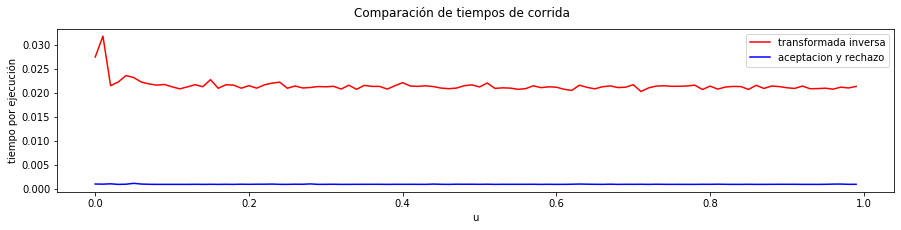

In [82]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa, 'r', label = 'transformada inversa')
ax.plot(aceptacionYrechazo, 'b', label = 'aceptacion y rechazo')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('tiempo por ejecución')

ax.legend(loc = 'best')

plt.suptitle('Comparación de tiempos de corrida')

## Ejercicio 5

Implemente tres métodos para generar una variable X que toma los valores del 1 al 10, con probabilidades p1=0.11, p2=0.14, p3=0.09, p4=0.08, p5=0.12, p6=0.10, p7=0.09, p8=0.07, p9=0.11, p10=0.09 usando:

In [122]:
p = [0.11,0.14,0.09,0.08,0.12,0.1,0.09,0.07,0.11,0.09]
sorted(p,reverse=True)

[0.14, 0.12, 0.11, 0.11, 0.1, 0.09, 0.09, 0.09, 0.08, 0.07]

### Transformada inversa

In [123]:
def tInversaEj5(p):
    p = sorted(p,reverse=True)
    u = random()
    if u < sum(p[:1]):
        res = 2
    elif u < sum(p[:2]):
        res = 5
    elif u < sum(p[:3]):
        res = 1
    elif u < sum(p[:4]):
        res = 9
    elif u < sum(p[:5]):
        res = 6
    elif u < sum(p[:6]):
        res = 3
    elif u < sum(p[:7]):
        res = 7
    elif u < sum(p[:8]):
        res = 10
    elif u < sum(p[:9]):
        res = 4
    else:
        res = 8
    return res

### Aceptacion y rechazo

In [142]:
def rechazoEj5(p):
    n = len(p)
    q = [1/n for _ in range(n)]
    assert(len(q)==len(p))
    c = 1
    # We use the optimum c, that is the largest one necessary
    for i in range(len(p)):
        if (p[i]/q[i]) >= c:
            c = p[i]/q[i]    
    res = 0
    u = random()
    y = randint(0,9)
    while u < p[y] / c * q[y]:
        u = random()
        res = y
    return res

### Método de la urna: 
utilizar un arreglo A de tamaño 100 donde cada valor i está en exactamente p(i)∗100 posiciones .El método debe devolver A[k] con probabilidad 0.01. ¿Por qué funciona?

In [143]:
def metodoUrnaEj5(p):
    A = [0] * 100
    initPos = 0
    for x in range(0,len(p)):
        nPositions = int(p[x] * 100)
        for j in range(initPos,initPos+nPositions):
            A[j] = x
        initPos += nPositions
    u = randint(0,99)
    return A[u]
        
    

In [144]:
### Comparación de tiempos:
n = 100
tInversa = [0] * n
aceptacionYrechazo = [0] * n
metodoUrna = [0] * n

for u in range(n):
    tInversa[u] = timeit("tInversaEj4()", number = 100000, globals = globals())
    aceptacionYrechazo[u] = timeit(setup = "rechazoEj5(p)", number = 100000, globals = globals())
    metodoUrna[u] = timeit(setup = "metodoUrnaEj5(p)", number = 100000, globals = globals())

Text(0.5, 0.98, 'Comparación de tiempos de corrida')

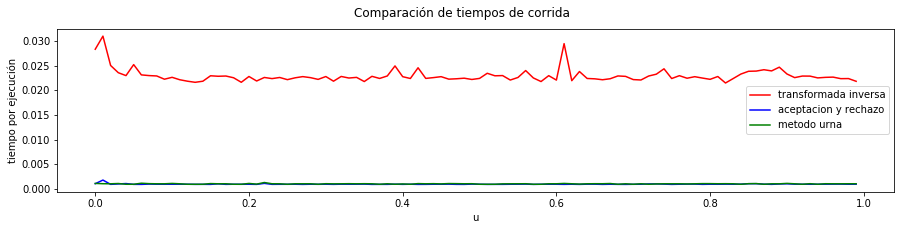

In [145]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa, 'r', label = 'transformada inversa')
ax.plot(aceptacionYrechazo, 'b', label = 'aceptacion y rechazo')
ax.plot(metodoUrna,'g',label = 'metodo urna')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('tiempo por ejecución')

ax.legend(loc = 'best')

plt.suptitle('Comparación de tiempos de corrida')

## Ejercicio 6
Implemente dos métodos para generar una binomial Bin(n,p):  
i)  Usando transformada inversa.  
ii) Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.  


Para ambos métodos:  
- a)  Compare la eficiencia de ambos algoritmos para n=10 y p=0.3, evaluando el tiempo necesario para realizar 10000 simulaciones.  
- b)  Estime el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10 respectivamente.
- c)  Compare estos valores con las probabilidades teóricas de la binomial. Si están alejados, revise el código.

### Transformada inversa

In [154]:
def binomial1(n,p):
    'Método de transformada inversa eligiendo p < 0.5'
    U = random()
    i = 0
    reversedP = False
    if p > 0.5:
        p = 1-p
        reversedP = True
    c = p / (1-p)
    prob = (1-p) ** n
    F = prob
    while U >= F:
        prob = c * (n-i) / (i+1) * prob
        F= F + prob 
        i = i + 1
    res = i
    if reversedP:
        res = n - i
    return res

### Simulacion

In [155]:
def simulationEj6(n,p):
    successes = 0
    for _ in range(n):
        u = random()
        if u < p:
            successes+=1
    return successes
        

In [161]:
### Comparación de tiempos:
N = 100
tInversa = [0] * N
simulacion = [0] * N
n , p = 10, 0.3

for u in range(N):
    tInversa[u] = timeit("binomial1(n,p)", number = 100000, globals = globals())
    simulacion[u] = timeit(setup = "simulationEj6(n,p)", number = 100000, globals = globals())


Text(0.5, 0.98, 'Comparación de tiempos de corrida')

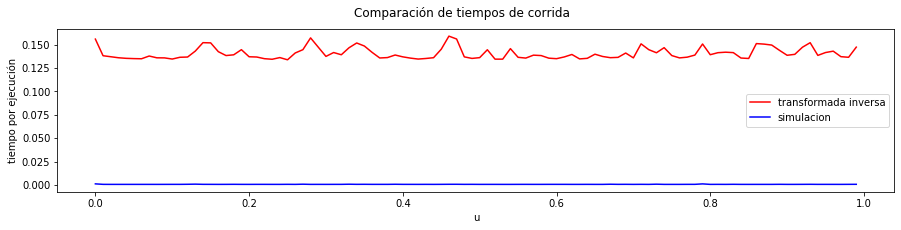

In [162]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa, 'r', label = 'transformada inversa')
ax.plot(simulacion, 'b', label = 'simulacion')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('tiempo por ejecución')

ax.legend(loc = 'best')

plt.suptitle('Comparación de tiempos de corrida')

In [166]:
N = 10000
n , p = 10, 0.3
simR = []
tInvR = []
for _ in range(N):
    simR.append(simulationEj6(n,p))
    tInvR.append(binomial1(n,p))

(array([2.790e+02, 1.220e+03, 2.424e+03, 2.711e+03, 1.913e+03, 9.920e+02,
        3.540e+02, 9.500e+01, 1.100e+01, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

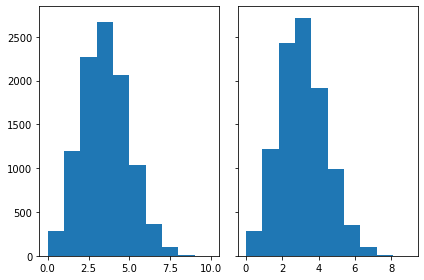

In [167]:
n_bins = 10

# Generate a normal distribution, center at x=0 and y=5
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(simR, bins=n_bins)
axs[1].hist(tInvR, bins=n_bins)

## Ejercicio 7

In [168]:
def Poisson(lamda):
    '''Método de transformada inversa'''
    U = random() 
    i = 0; p = exp(-lamda)
    F=p
    while U >= F:
        i += 1        
        p *=lamda / i
        F = F + p
    return i

def Poisson_ordenado(L):
    I = int(L)
    p = exp(-L)
    F = p
    ## Cálculo de F(I)
    for i in range(1,I+1):
        p *= L / i
        F += p
    u=random()
    if u>=F: #recorre I, I+1, I+2, ...
        while u>F:
            I += 1
            p *= L/I
            F += p
        return I
    else:
        while u < F: #recorre I-1, I-2, ...
            F -= p
            p *= I / L
            I -= 1
        return I + 1
    
def Poisson_con_exp(lamda):
    X = 0
    Producto = 1 - random()
    cota = np.exp(-lamda)
    while Producto >= cota:
        Producto *= 1- random()
        X += 1
    return X


## Ejercicio 8
Desarrolle el método de la Trasformada Inversa y el de Rechazo para generar una variable aleatoria X cuya distribución de probabilidad está dada por:  
![](images/ej8.jpg)

In [3]:
from scipy.stats import binom,poisson
def P_x(lamda,k,i):
    top = poisson.fmp(i,lamda)
    bottom = sum(poisson.pmf(j, lambda_) for j in range(K))
    return top/bottom

def tInversaEj8(lamda,k):
    # Primero tenemos que generar la distribución de probabilidad para cada i:
    p_i = {i:P_x(lamda,k,i) for i in range(k)}
    # Ordenar los valores para eficiencia
    p_i = sorted(p_i.items(), key=lambda x: x[1], reverse=True)
    # Ahora hacemos 